# Runner

This notebook shows how to perform a AlphaPept run.

In [ ]:
from time import time
%load_ext autoreload
%autoreload 2

## Logger

In [ ]:
import sys
import logging
# Create logger
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create STDERR handler
handler = logging.StreamHandler(sys.stderr)
# ch.setLevel(logging.DEBUG)

# Create formatter and add it to the handler
formatter = logging.Formatter('%(asctime)s %(levelname)-s - %(message)s', "%Y-%m-%d %H:%M:%S")
handler.setFormatter(formatter)

# Set STDERR handler as the only handler 
logger.handlers = [handler]

2020-06-01 02:53:52 INFO - Checking raw path F:/rawdata/04_hela_testrun/20190402_QX1_SeVW_MA_HeLa_500ng_LC11.raw.
2020-06-01 02:53:52 INFO - NPZ for raw file present. Skipping conversion step.
2020-06-01 02:53:52 INFO - Raw path okay.
2020-06-01 02:53:52 INFO - Checking library path.
2020-06-01 02:53:52 INFO - NPZ for library file present.
2020-06-01 02:53:52 INFO - Library path okay.
2020-06-01 02:53:52 INFO - Using Features from raw data


Checking Settings
Running first search.


2020-06-01 02:54:20 INFO - First search complete. Compared 30,099,867 spectra and found 175,590 psms.


Extracting columns for scoring.


2020-06-01 02:55:10 INFO - Extracted columns for 175,590 psms.


Calibrating features.
Scoring psms.


2020-06-01 02:55:11 INFO - Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-06-01 02:55:11 INFO - NumExpr defaulting to 8 threads.
2020-06-01 02:55:11 INFO - Scoring complete. For 0.01 FDR found 58,674 targets and 586 decoys.
2020-06-01 02:55:11 INFO - Precursor Offset (PPM) is -0.24 (mean), 2.45 (std)
2020-06-01 02:56:01 INFO - Calibration complete. Precursor Offset (PPM) is 0.00 (mean), 0.80 (std)
2020-06-01 02:56:01 INFO - Adjusting search bound to 2.39 ppm.


Running second search.


2020-06-01 02:56:08 INFO - Second search complete. Compared 7,988,983 spectra and found 104,604 psms.


Extracting columns for scoring.


2020-06-01 02:56:30 INFO - Extracted columns for 104,604 psms.


Scoring
The total number of available decoys is lower than the initial set of high scoring targets.
Training & cross-validation on 2537 targets and 2537 decoys
The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
The train accuracy was 0.9938904217579819
Testing on 10148 targets and 10148 decoys
The test accuracy was 0.945752857705952


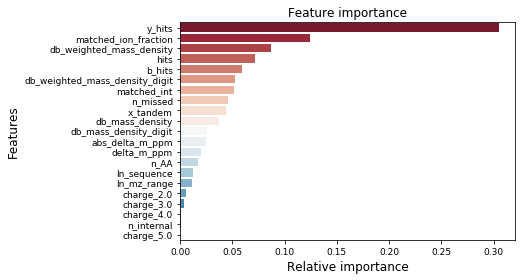

60,707 target (607 decoy) of 63043 PSM. fdr 0.009999 for a cutoff of 0.15 


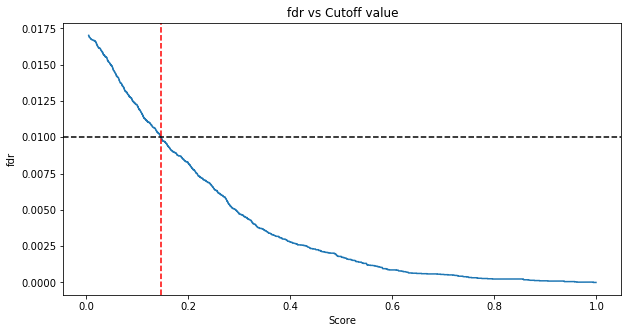

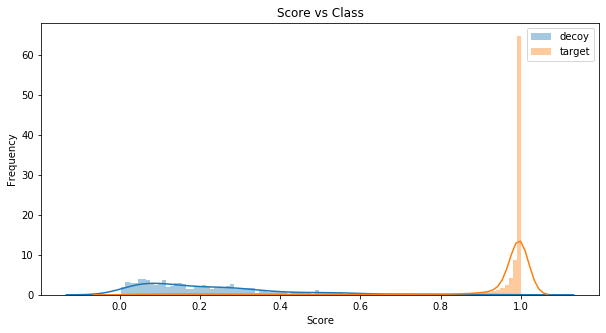

2020-06-01 02:56:43 INFO - First FDR Cut Scoring peptides complete. For 0.01 FDR found 60,707 targets and 607 decoys.


FDR control on peptides


2020-06-01 02:56:43 INFO - Scoring peptides complete. For 0.01 FDR found 60,323 targets and 529 decoys.


Perform protein grouping


2020-06-01 02:57:24 INFO - Scoring proteins complete. For 0.01 FDR found 59,010 targets and 84 decoys. A total of 7,338 proteins found.


Saving.


2020-06-01 02:57:26 INFO - Saved to F:/rawdata/04_hela_testrun/20190402_QX1_SeVW_MA_HeLa_500ng_LC11_ap.csv
2020-06-01 02:57:26 INFO - Settings saved to F:/rawdata/04_hela_testrun/20190402_QX1_SeVW_MA_HeLa_500ng_LC11_ap.yaml


Complete.




In [ ]:
from time import time
import numpy as np
from alphapept.runner import alpha_runner
from tqdm.notebook import tqdm as tqdm

from alphapept.settings import load_settings

if False:
    settings = load_settings('default_settings.yaml')

    settings['fasta']['library_path'] = 'F:/rawdata/zz.database/uniprot_Human_reviewed_March_2019_manual.npz'
    settings['fasta']['fasta_path'] = 'F:/rawdata/zz.database/uniprot_Human_reviewed_March_2019_manual.fasta'
    settings['fasta']['contaminants_path'] = 'F:/projects/alphapept/contaminants.fasta'

    settings['raw']['raw_path_npz'] = 'F:/rawdata/04_hela_testrun/20190402_QX1_SeVW_MA_HeLa_500ng_LC11.npz'
    settings['raw']['raw_path'] = 'F:/rawdata/04_hela_testrun/20190402_QX1_SeVW_MA_HeLa_500ng_LC11.raw'

    settings['quantification']['max_lfq'] = False
    settings['misc']['match_between_runs'] = False
    settings['general']['find_features'] = False
    settings['general']['create_library'] = False
    settings['general']['convert_raw'] = False

    settings['general']['score'] = 'random_forest'

    with tqdm(total=100, desc='Current Progress', unit='%') as current_pbar:
        with tqdm(total=100, desc='Overall Progress', unit='%') as overall_pbar:

            def current_progress(current):
                to_update = np.round(current*100-current_pbar.n, 2)
                current_pbar.update(to_update)

            def overall_progress(current):
                to_update = np.round(current-overall_pbar.n, 2)
                overall_pbar.update(to_update)

            df, features = alpha_runner(settings, overall_progress = overall_progress, current_progress = current_progress, CURRENT_TASK = print)

            #df.to_csv('hela_ml_.csv')